### Table of Contents
* [Part1: Data structure](#p1)
  * [1.Required librairies](#lib)
  * [2.Files of the datasets](#files)
       * [2.1.First dataset:EdStatsCountry-Series.csv](#d1)
       * [2.2.Second dataset:EdStatsCountry.csv](#d2)
       * [2.3.Third dataset: EdStatsData.csv](#d3)
       * [2.4.Fourth Dataset:EdStatsFootNote.csv](#d4)
       * [2.5.Fifth dataset : EdStatsSeries.csv](#d5)
* [Part2: Indicators study](#p2)
  * [1.Remove the small countries](#sc)
  * [2.Choice of the indicators](#ci)
  * [3.Order of magnitude of the indicators](#og)
  * [4.Order of magnitude of the indicators per country](#ogc)
  * [5.Graphs:  Choropleth Maps](#fol)

# Part1: Data structure <a class="anchor" id="p1"></a>
## 1.Required librairies<a class="anchor" id="lib"></a>

In [138]:

#import sys
#!{sys.executable} -m pip install missingno

In [139]:
#!pip install geopy

In [140]:
#!pip install requests

In [141]:
#!pip install folium

In [142]:
#importing required packages
import pandas as pd
import numpy as np
import missingno as msno
#import geopandas as gpd
#import geopy as gp
import requests 
import folium 



In [143]:
#loop  to give the paquetages' versions

librairies={'pandas':pd,'numpy':np,'missingno':msno}
for key,values in librairies.items():
    print(key,'\'s version is', values.__version__)


pandas 's version is 1.4.2
numpy 's version is 1.22.3
missingno 's version is 0.5.1


## 2.Files of the datasets <a class="anchor" id="Files"></a>

In [144]:
from os import listdir
from os.path import isfile, join
mypath='Projet+Python_Dataset_Edstats_csv'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(onlyfiles)

['EdStatsCountry-Series.csv', 'EdStatsCountry.csv', 'EdStatsData.csv', 'EdStatsFootNote.csv', 'EdStatsSeries.csv']


### 2.1.First dataset:EdStatsCountry-Series.csv <a class="anchor" id="d1"></a>

In [145]:
#Dataset1
f1=mypath+'/'+onlyfiles[0]
print(onlyfiles[0])
df1=pd.read_csv(f1)
print('Rows number:',df1.shape[0], ',Columns number:',df1.shape[1])
df1.columns
print( onlyfiles[0], 'columns\'name are',df1.columns.values)


EdStatsCountry-Series.csv
Rows number: 613 ,Columns number: 4
EdStatsCountry-Series.csv columns'name are ['CountryCode' 'SeriesCode' 'DESCRIPTION' 'Unnamed: 3']


In [146]:
df1.head(3)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN


In [147]:

df1['SeriesCode'].unique().shape
df1.shape

(613, 4)

In [148]:
#duplicated rows
bool_series = df1.duplicated()
print('Number of duplicated rows:',(bool_series).sum())

Number of duplicated rows: 0


In [149]:
#Missing values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [150]:
#Number of missing values in each column
df1.isna().sum()

CountryCode      0
SeriesCode       0
DESCRIPTION      0
Unnamed: 3     613
dtype: int64

### 2.2.Second dataset:EdStatsCountry.csv <a class="anchor" id="d2"></a>

In [151]:
#Dataset2
f2=mypath+'/'+onlyfiles[1]
print(onlyfiles[1])
df2=pd.read_csv(f2)

print('Rows number:',df2.shape[0], ',Columns number:',df2.shape[1])
df2.columns
print( onlyfiles[1], 'columns\'name are',df2.columns.values)


EdStatsCountry.csv
Rows number: 241 ,Columns number: 32
EdStatsCountry.csv columns'name are ['Country Code' 'Short Name' 'Table Name' 'Long Name' '2-alpha code'
 'Currency Unit' 'Special Notes' 'Region' 'Income Group' 'WB-2 code'
 'National accounts base year' 'National accounts reference year'
 'SNA price valuation' 'Lending category' 'Other groups'
 'System of National Accounts' 'Alternative conversion factor'
 'PPP survey year' 'Balance of Payments Manual in use'
 'External debt Reporting status' 'System of trade'
 'Government Accounting concept' 'IMF data dissemination standard'
 'Latest population census' 'Latest household survey'
 'Source of most recent Income and expenditure data'
 'Vital registration complete' 'Latest agricultural census'
 'Latest industrial data' 'Latest trade data'
 'Latest water withdrawal data' 'Unnamed: 31']


In [152]:
df2.head(3)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN


In [153]:
#duplicated rows
bool_series2 = df2.duplicated()
print('Number of duplicated rows:',(bool_series2).sum())

Number of duplicated rows: 0


In [154]:
#Missing values
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [155]:
#Number of missing values in each column
df2.isna().sum()

Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion factor                        194
PPP survey year                

<AxesSubplot:>

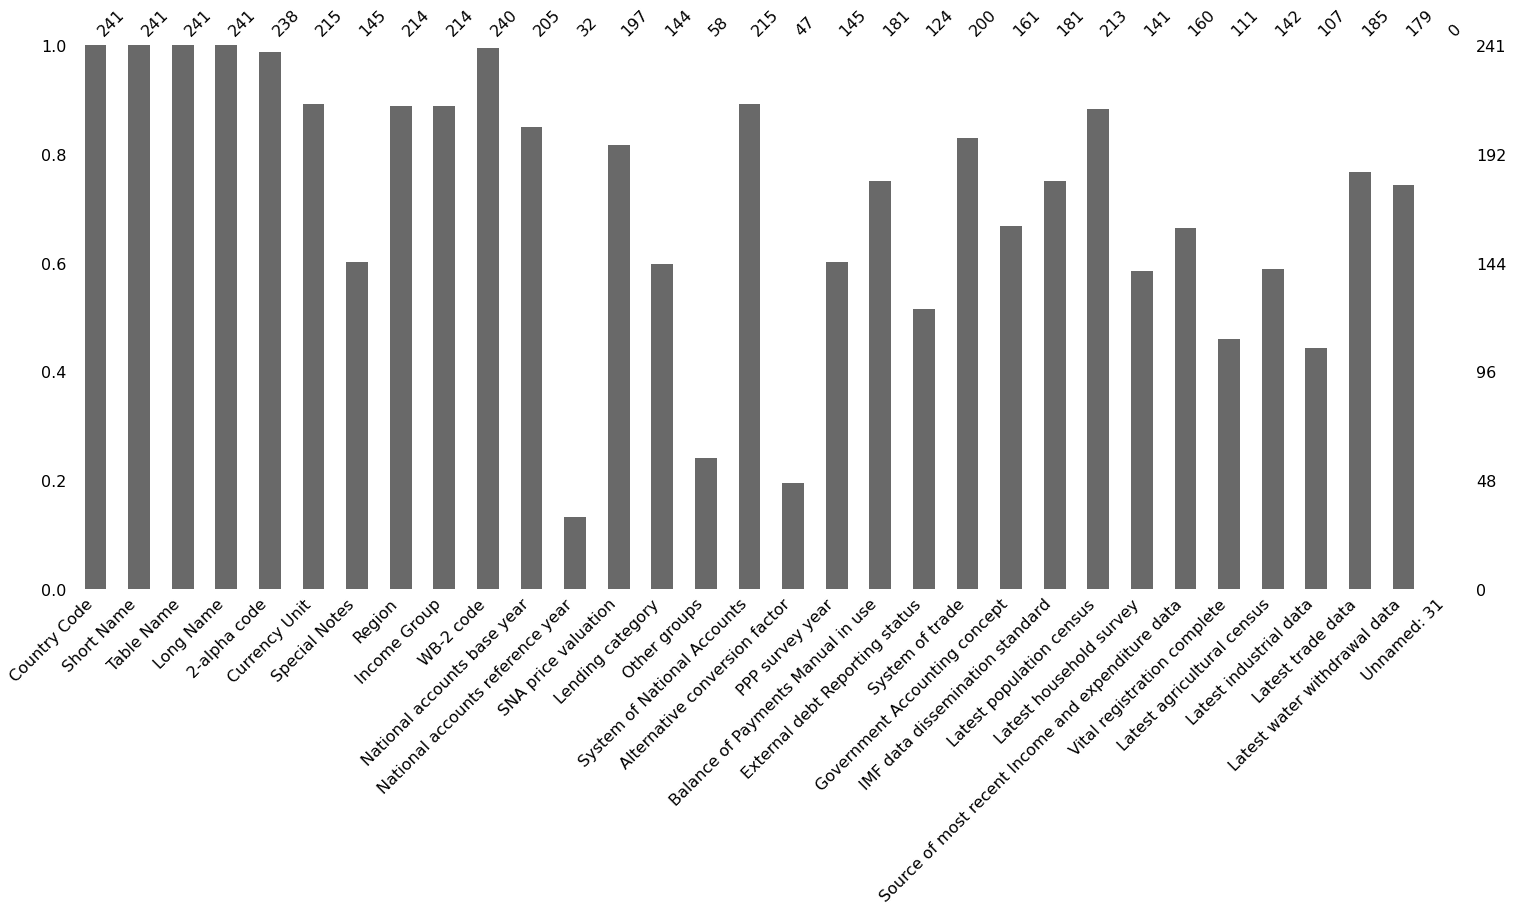

In [156]:
# Gives a bar chart of the missing values
msno.bar(df2)

<AxesSubplot:>

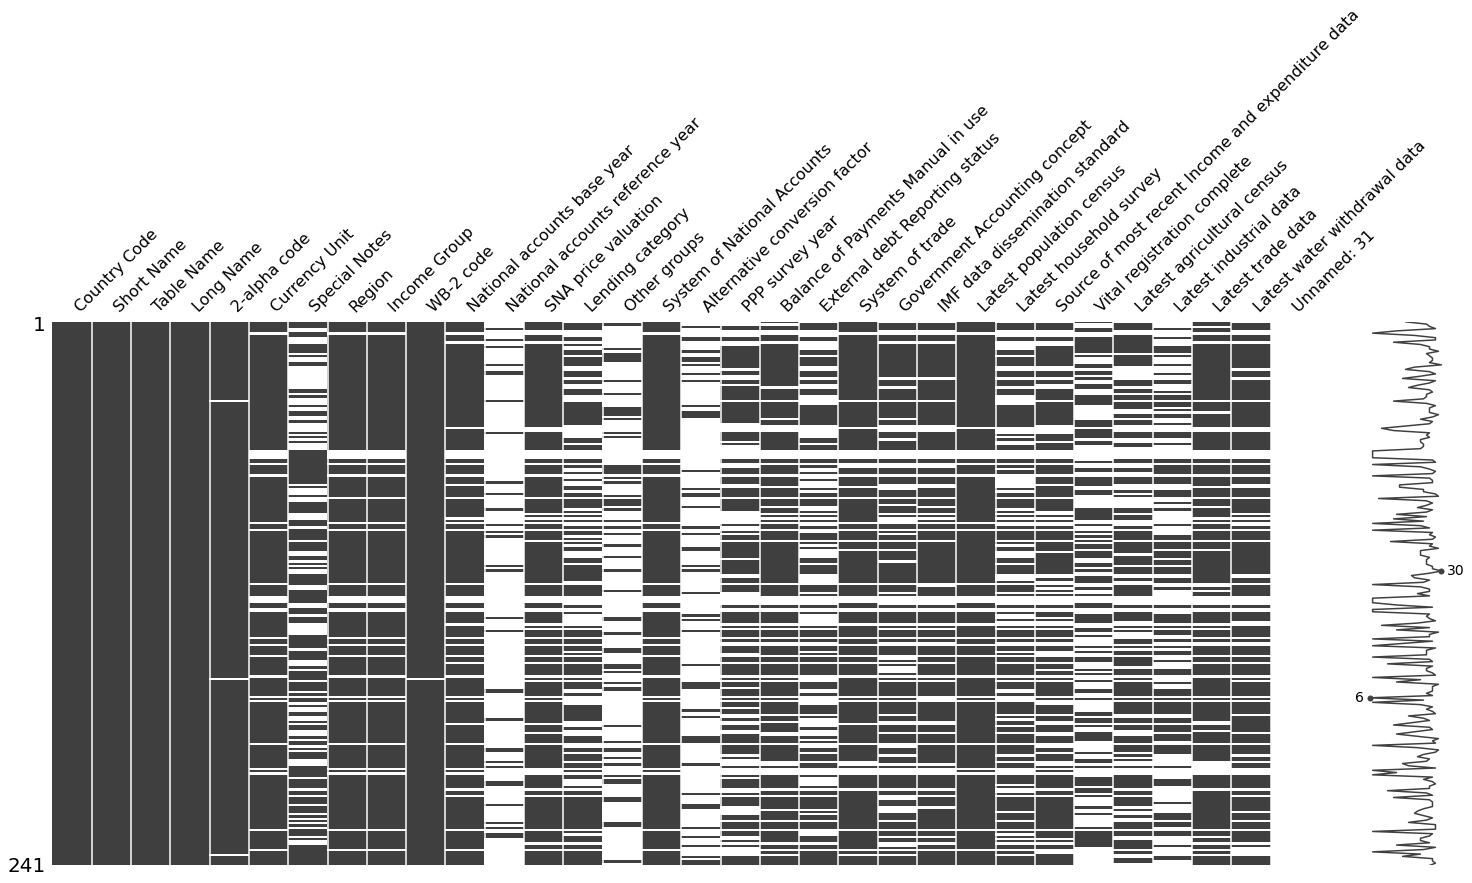

In [157]:
# Gives positional information of the missing values
msno.matrix(df2)

### 2.3.Third dataset: EdStatsData.csv <a class="anchor" id="d3"></a>

In [158]:
#Dataset3
f3=mypath+'/'+onlyfiles[2]
print(onlyfiles[2])
df3=pd.read_csv(f3)
print('Rows number:',df3.shape[0], ',Columns number:',df3.shape[1])
df3.columns
print( onlyfiles[2], 'columns\'name are',df3.columns.values)

EdStatsData.csv
Rows number: 886930 ,Columns number: 70
EdStatsData.csv columns'name are ['Country Name' 'Country Code' 'Indicator Name' 'Indicator Code' '1970'
 '1971' '1972' '1973' '1974' '1975' '1976' '1977' '1978' '1979' '1980'
 '1981' '1982' '1983' '1984' '1985' '1986' '1987' '1988' '1989' '1990'
 '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999' '2000'
 '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009' '2010'
 '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2020' '2025' '2030'
 '2035' '2040' '2045' '2050' '2055' '2060' '2065' '2070' '2075' '2080'
 '2085' '2090' '2095' '2100' 'Unnamed: 69']


In [159]:
df3.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
df3['Indicator Name'].unique()

array(['Adjusted net enrolment rate, lower secondary, both sexes (%)',
       'Adjusted net enrolment rate, lower secondary, female (%)',
       'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
       ..., 'Youth literacy rate, population 15-24 years, female (%)',
       'Youth literacy rate, population 15-24 years, gender parity index (GPI)',
       'Youth literacy rate, population 15-24 years, male (%)'],
      dtype=object)

In [161]:
#duplicated rows
bool_series3 = df3.duplicated()
print('Number of duplicated rows:',(bool_series3).sum())

Number of duplicated rows: 0


In [162]:
#Missing values
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [163]:
df3.isna().sum()

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
                   ...  
2085              835494
2090              835494
2095              835494
2100              835494
Unnamed: 69       886930
Length: 70, dtype: int64

<AxesSubplot:>

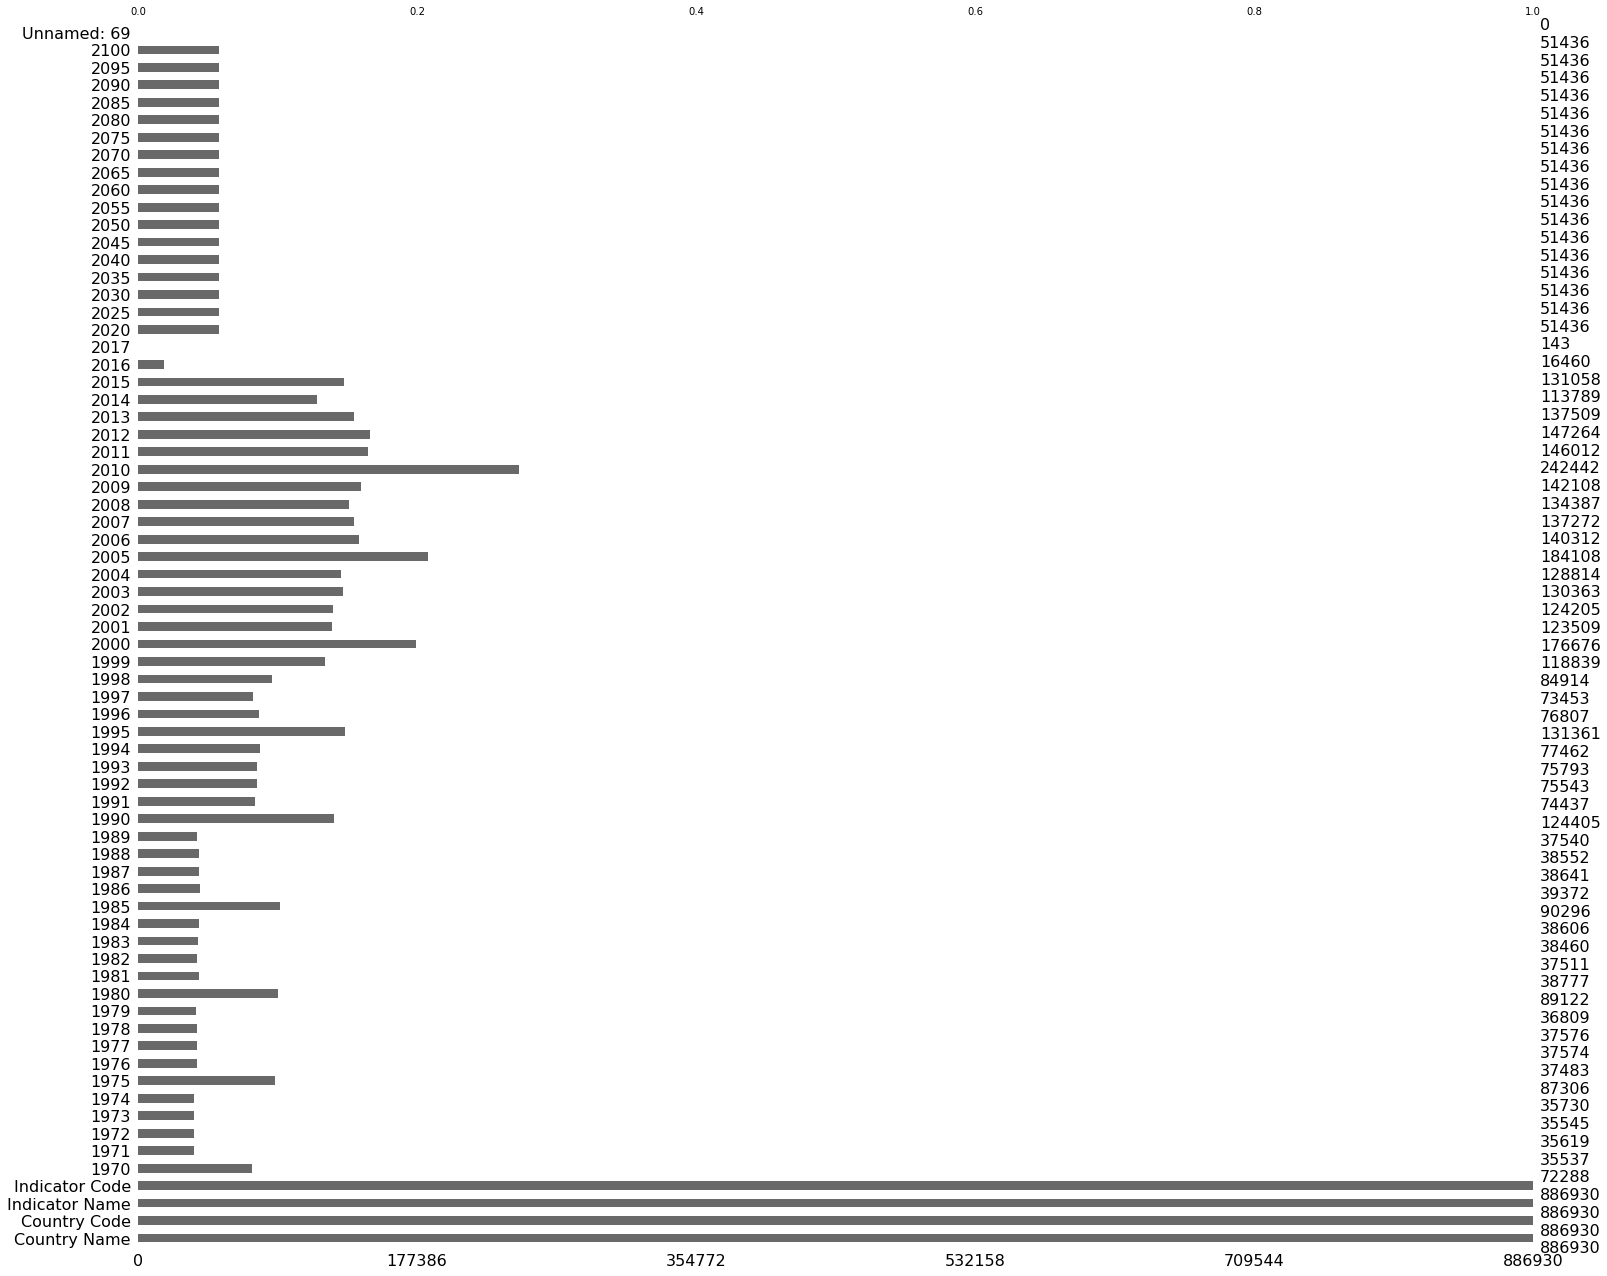

In [164]:
# Gives a bar chart of the missing values
msno.bar(df3)

### 2.4.Fourth Dataset:EdStatsFootNote.csv <a class="anchor" id="d4"></a>

In [165]:
#Dataset4
f4=mypath+'/'+onlyfiles[3]
print(onlyfiles[3])
df4=pd.read_csv(f4)

print('Rows number:',df4.shape[0], ',Columns number:',df4.shape[1])
df4.columns
print( onlyfiles[3], 'columns\'name are',df4.columns.values)

EdStatsFootNote.csv
Rows number: 643638 ,Columns number: 5
EdStatsFootNote.csv columns'name are ['CountryCode' 'SeriesCode' 'Year' 'DESCRIPTION' 'Unnamed: 4']


In [166]:
df4.head(3)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN


In [167]:
#duplicated rows
bool_series4 = df4.duplicated()
print('Number of duplicated rows:',(bool_series4).sum())

Number of duplicated rows: 0


In [168]:
#Missing values
#information about the dataset
df4.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


In [169]:
#Number of missing values in each column
df4.isna().sum()

CountryCode         0
SeriesCode          0
Year                0
DESCRIPTION         0
Unnamed: 4     643638
dtype: int64

<AxesSubplot:>

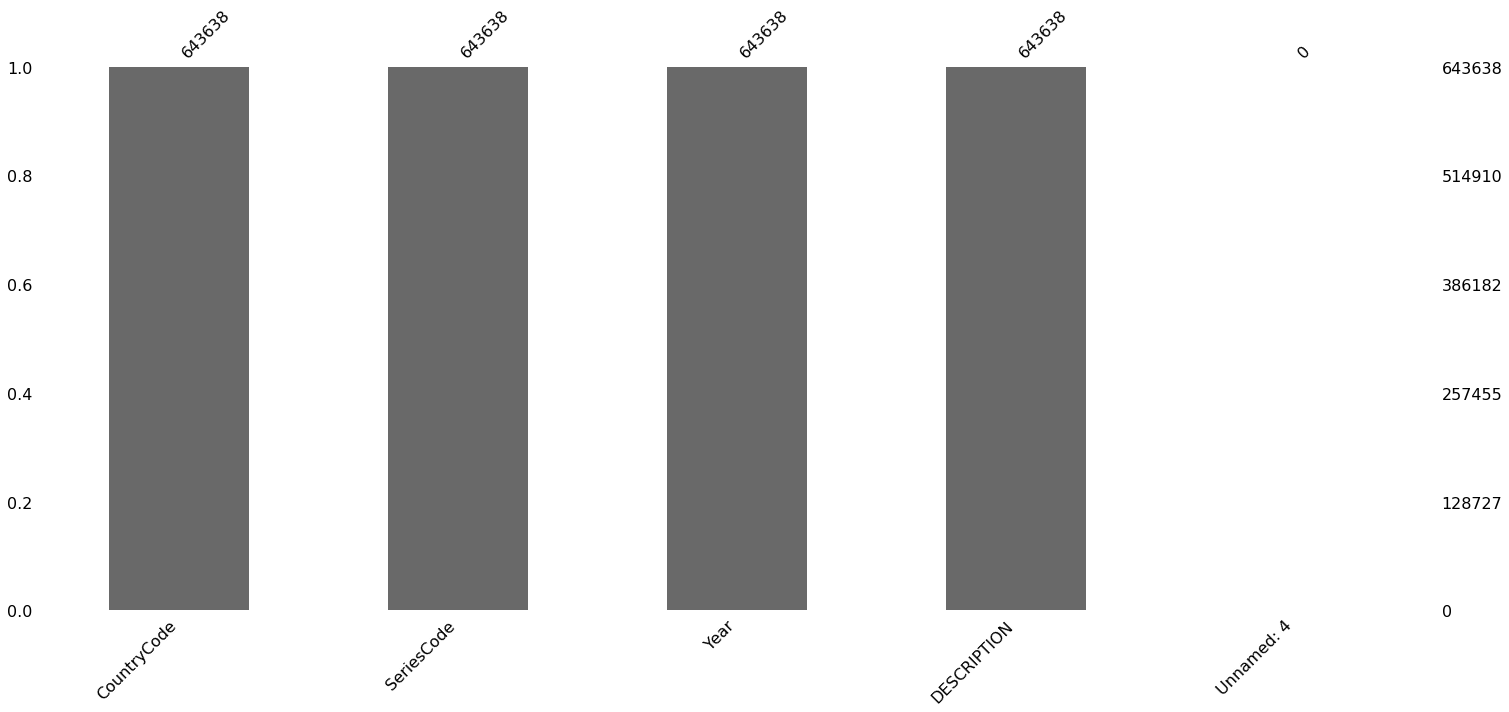

In [170]:
# Gives a bar chart of the missing values
msno.bar(df4)

### 2.5.Fifth dataset : EdStatsSeries.csv <a class="anchor" id="d5"></a>

In [171]:
#Dataset5
f5=mypath+'/'+onlyfiles[4]
print(onlyfiles[4])
df5=pd.read_csv(f5)

print('Rows number:',df5.shape[0], ',Columns number:',df5.shape[1])
df5.columns
print( onlyfiles[4], 'columns\'name are',df5.columns.values)

EdStatsSeries.csv
Rows number: 3665 ,Columns number: 21
EdStatsSeries.csv columns'name are ['Series Code' 'Topic' 'Indicator Name' 'Short definition'
 'Long definition' 'Unit of measure' 'Periodicity' 'Base Period'
 'Other notes' 'Aggregation method' 'Limitations and exceptions'
 'Notes from original source' 'General comments' 'Source'
 'Statistical concept and methodology' 'Development relevance'
 'Related source links' 'Other web links' 'Related indicators'
 'License Type' 'Unnamed: 20']


In [172]:
df5.head(3)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
#duplicated rows
bool_series5 = df5.duplicated()
print('Number of duplicated rows:',(bool_series5).sum())

Number of duplicated rows: 0


In [174]:
#Missing values
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

In [175]:
#Number of missing values in each column
df5.isna().sum()

Series Code                               0
Topic                                     0
Indicator Name                            0
Short definition                       1509
Long definition                           0
Unit of measure                        3665
Periodicity                            3566
Base Period                            3351
Other notes                            3113
Aggregation method                     3618
Limitations and exceptions             3651
Notes from original source             3665
General comments                       3651
Source                                    0
Statistical concept and methodology    3642
Development relevance                  3662
Related source links                   3450
Other web links                        3665
Related indicators                     3665
License Type                           3665
Unnamed: 20                            3665
dtype: int64

<AxesSubplot:>

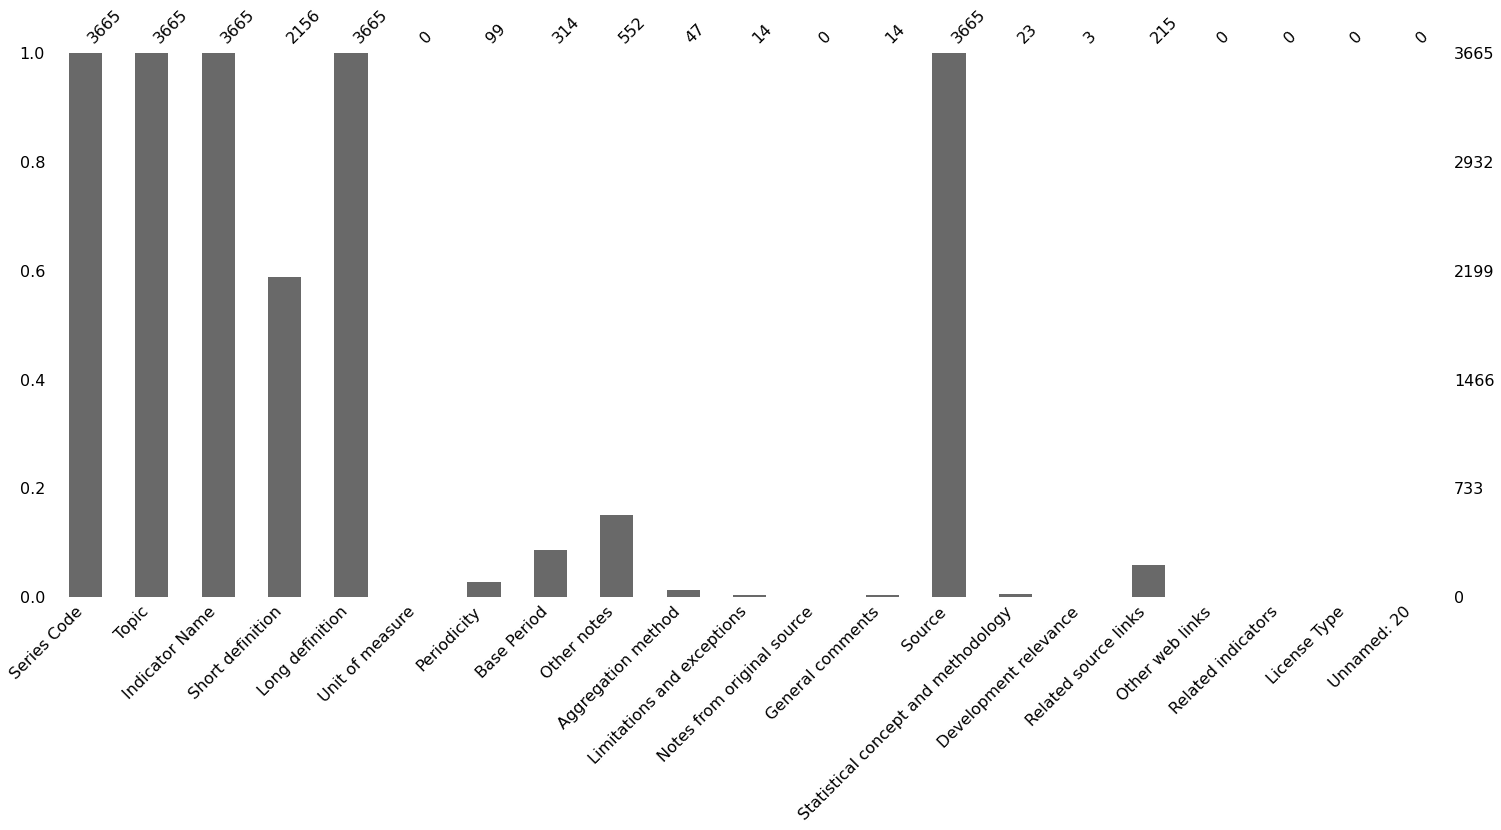

In [176]:
# Gives a bar chart of the missing values
msno.bar(df5)

# Part2: Indicators study <a class="anchor" id="p2"></a> 
## 1.Remove the small countries <a class="anchor" id="sc"></a> 

In [193]:
#From the dataset EdstatsData i take  information between 1990 and 2025
#remove rows with (all) nan 
years=['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010',
 '2011','2012','2013','2014','2015','2016','2017','2020','2025']
data_years=df3[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010',
 '2011','2012','2013','2014','2015','2016','2017','2020','2025']]
data_years_filtered = data_years.dropna(subset=years,how='all')
retained_country=data_years_filtered['Country Name'].unique()
print('Number of retained country:', retained_country.shape[0])


Number of retained country: 242


In [178]:
data_years_filtered.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2020', '2025'],
      dtype='object')

In [194]:

data_years_filtered['Indicator Name'].unique().shape

(3665,)

In [192]:
#Normalize values of indicators in years
#data_years_filtered[years] = data_years_filtered[years].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [195]:
#data_years_filtered.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,71.995819,72.602837,70.032722,70.464821,72.645683,71.811760,...,85.211998,85.245140,86.101669,85.511940,85.320152,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,65.827492,66.797028,63.260429,63.972111,67.033043,65.761559,...,82.871651,82.861389,84.401413,83.914032,83.820831,NaN,NaN,NaN,NaN,NaN


## 2.Choice of the indicators <a class="anchor" id="ci"></a>

In [215]:
indic=['Adjusted net enrolment rate, primary, both sexes (%)',
            #'EGRA: Reading Comprehension - Share of students with a zero score (%). Lunda. 2nd Grade',
            #'EGRA: Reading Comprehension - Share of students with a zero score (%). Luvale. 2nd Grade',
            #'EGRA: Reading Comprehension - Share of students with a zero score (%). Silozi. 2nd Grade'
            'Theoretical duration of lower secondary education (years)',
            'Theoretical duration of pre-primary education (years)',
            'Theoretical duration of primary education (years)',
            'Theoretical duration of secondary education (years)',
            'Theoretical duration of upper secondary education (years)'
            'Percentage of enrolment in pre-primary education in private institutions (%)',
            'Adult illiterate population, 15+ years, both sexes (number)']

data_years_filtered_indicators=data_years_filtered.loc[data_years_filtered['Indicator Name'].isin(indic)]
indicators=data_years_filtered_indicators['Indicator Name'].unique()
print('Retained indicators: ',indicators ,'\n')
print(indicators.shape)

Retained indicators:  ['Adjusted net enrolment rate, primary, both sexes (%)'
 'Adult illiterate population, 15+ years, both sexes (number)'
 'Theoretical duration of lower secondary education (years)'
 'Theoretical duration of pre-primary education (years)'
 'Theoretical duration of primary education (years)'
 'Theoretical duration of secondary education (years)'] 

(6,)


## 3.Order of magnitude of the indicators <a class="anchor" id="og"></a>

In [216]:
data_years_filtered_indicators['average']=data_years_filtered_indicators[years].mean(axis=1)
#data_years_filtered_indicators['std']=data_years_filtered_indicators[years].std(axis=1)
#data_years_filtered_indicators['median']=data_years_filtered_indicators[years].median(axis=1)

C:\Users\IMEN\AppData\Local\Temp\ipykernel_4812\3233303475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_years_filtered_indicators['average']=data_years_filtered_indicators[years].mean(axis=1)


## 4.Order of magnitude of the indicators per country<a class="anchor" id="ogc"></a>

In [217]:
def og_indicator_country(country):
    country_og_indic=data_years_filtered_indicators[data_years_filtered_indicators['Country Name']==country]
    return country_og_indic

In [199]:
#for example Arab World 
og_indicator_country('Arab World').head()


,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2020,2025,average
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,7.199582e+01,7.260284e+01,7.003272e+01,7.046482e+01,7.264568e+01,7.181176e+01,...,8.524514e+01,8.610167e+01,8.551194e+01,8.532015e+01,NaN,NaN,NaN,NaN,NaN,7.887246e+01
17,Arab World,ARB,"Adult illiterate population, 15+ years, both s...",UIS.LP.AG15T99,6.031946e+07,6.031946e+07,6.031946e+07,6.031946e+07,6.031946e+07,6.155295e+07,...,5.569861e+07,5.569861e+07,5.569861e+07,5.569861e+07,NaN,NaN,NaN,NaN,NaN,5.896452e+07



## 5.Graphs: Folium Choropleth Maps<a class="anchor" id="fol"></a>

In [218]:
#Example for the first indicator
INDICATOR = indicators[0]#'Adjusted net enrolment rate, primary, both sexes (%)'

data = data_years_filtered_indicators[data_years_filtered_indicators['Indicator Name'] == INDICATOR]

data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2020,2025,average
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,71.995819,72.602837,70.032722,70.464821,72.645683,71.811760,...,85.245140,86.101669,85.511940,85.320152,NaN,NaN,NaN,NaN,NaN,78.872465
3669,East Asia & Pacific,EAS,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,95.678238,95.928078,96.036819,95.276810,94.385307,93.111992,...,96.364761,96.322609,96.094063,96.207962,NaN,NaN,NaN,NaN,NaN,95.289594
7334,East Asia & Pacific (excluding high income),EAP,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,95.299461,95.600441,95.739662,94.952911,93.990089,92.647591,...,96.133148,96.097107,95.901901,96.025803,NaN,NaN,NaN,NaN,NaN,94.993813
10999,Euro area,EMU,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,97.026253,97.030411,96.507820,96.588882,96.424889,96.855568,...,98.986740,99.071228,99.104248,98.919312,NaN,NaN,NaN,NaN,NaN,98.415881
14664,Europe & Central Asia,ECS,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,94.923798,95.300308,95.054497,94.814293,94.707741,94.434372,...,97.329178,97.249649,97.306252,97.022087,NaN,NaN,NaN,NaN,NaN,96.371470


In [219]:
map_data = data[['Country Code', 'Country Name','average']]
map_data.head()

,Country Code,Country Name,average
4,ARB,Arab World,78.872465
3669,EAS,East Asia & Pacific,95.289594
7334,EAP,East Asia & Pacific (excluding high income),94.993813
10999,EMU,Euro area,98.415881
14664,ECS,Europe & Central Asia,96.371470


In [220]:
#Read the GeoJSON data for world-countries
geojson_url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'
response = requests.get(geojson_url)
geojson = response.json()

#geojson['features'][1]


In [204]:

#Create Folium Choropleth Map
M = folium.Map(location=[20, 10], zoom_start=2)

folium.Choropleth(
    geo_data=geojson,
    data=map_data,
    columns=['Country Code', 'average'],
    key_on='feature.id',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Mean of '+INDICATOR
).add_to(M)

M

In [205]:
#save map
M.save("index.html")

In [221]:
#function for all indicators
def map_per_indicator(INDICATOR):
    data = data_years_filtered_indicators[data_years_filtered_indicators['Indicator Name'] == INDICATOR]
    map_data = data[['Country Code','average']]
    #Create Folium Choropleth Map
    M = folium.Map(location=[20, 10], zoom_start=2)
    folium.Choropleth(geo_data=geojson,
                      data=map_data,
                      columns=['Country Code', 'average'],
                      key_on='feature.id',
                      fill_color='YlGnBu',
                      fill_opacity=0.7,
                      line_opacity=0.2,
                      legend_name='Mean of '+INDICATOR
                      ).add_to(M)

    M
        #save map
    map_name='Maps\Map of mean of '+INDICATOR+'.html'
    M.save(map_name)

In [222]:
for indicator in indicators:
    map_per_indicator(indicator)